<a href="https://colab.research.google.com/github/noeyxos/MS-AI-SCHOOL/blob/main/DL_keras_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression

In [2]:
# 데이터를 가져오는 부분 
from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [4]:
print(train_labels[0])

15.2


In [5]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [6]:
# 데이터 전처리 (Scaling)

mean = train_data.mean(axis =0)   # 각 항목별로 평균을 구한다. 
# 평균치를 다 빼주는 작업
train_data -= mean  # train_data = train_data - mean 과 같은 표현

#표준 편차 구하기
std = train_data.std(axis = 0)  # 각 컬럼별로 표준편차 구하기
train_data /= std

train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [7]:
# 모델의 구성
from keras import models 
from keras import layers

#매번 데이터가 바뀔 때 마다 신경망을 새로 생성하는게 귀찮아서 함수를 만들기로 한다. 
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))  # 회귀 값은 identity function을 사용하는데 아예 지정을 안 해주어도 똑같은 결과가 나온다 ! 

  model.compile(optimizer = 'rmsprop',
                loss= 'mse',  # 회귀 문제에 쓸 손실 함수
                metrics =['mse'])
  return model

In [8]:
# K- folder 검증을 사용한 훈련 검증 (전체 데이터의 갯수가 부족할 때 사용)

import numpy as np

k = 4               # folder 개수
num_val_samples = len(train_data) //  k # 한 folder의 데이터 수 
all_scores=[]

for i in range(k):
  print('처리중인 폴드 #', i )

# 검증 데이터의 준비 
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # 시작점 : i * num_val_samples,  끝점 : (i + 1) * num_val_samples
  val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

# 학습 데이터의 준비
  data1 = train_data[ : i * num_val_samples]
  data2 = train_data[(i+1) * num_val_samples : ]
  data1_labels = train_labels[ : i * num_val_samples]
  data2_labels = train_labels[(i+1) * num_val_samples : ]

  partial_train_data =np.concatenate([data1,data2], axis=0)  #concatenate : 똑같은 구조의 데이터 두개를 합쳐주는 메소드
  partial_train_labels =np.concatenate([data1_labels,data2_labels], axis=0)

# 모델의 학습
  model = build_model()
  model.summary()

  model.fit(partial_train_data, partial_train_labels, epochs = 500, batch_size=128, verbose=0)  #verbose=0 : 훈련사항을 보여주지 않음 

# 모델의 검증
  val_mse, val_mae = model.evaluate(val_data, val_labels)
  print(val_mse, val_mae)
  all_scores.append(val_mae)

처리중인 폴드 # 0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 9.3551 - mse: 9.3551
9.355069160461426 9.355069160461426
처리중인 폴드 # 1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)        

In [9]:
np.mean(all_scores)

12.332473278045654

In [10]:
import matplotlib.pyplot as plt

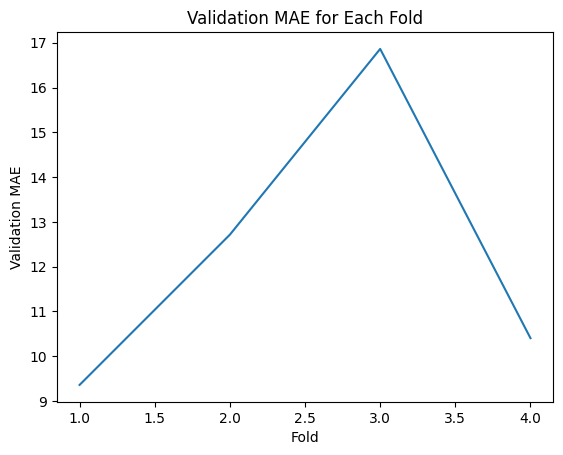

In [12]:
# 시각화
plt.plot(range(1, k + 1), all_scores)
plt.xlabel('Fold')
plt.ylabel('Validation MAE')
plt.title('Validation MAE for Each Fold')
plt.show()